In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("D:\IIT ROORKE\DataSet\Advertising.csv")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data_select=data.iloc[:,[1,2,3,4]]
data_select

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
df=pd.DataFrame(data)
float_coloumns=['TV','radio','newspaper','sales']

In [7]:
data= df[float_coloumns].astype(int)

In [8]:
data

,TV,radio,newspaper,sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12
...,...,...,...,...
195,38,3,13,7
196,94,4,8,9
197,177,9,6,12
198,283,42,66,25


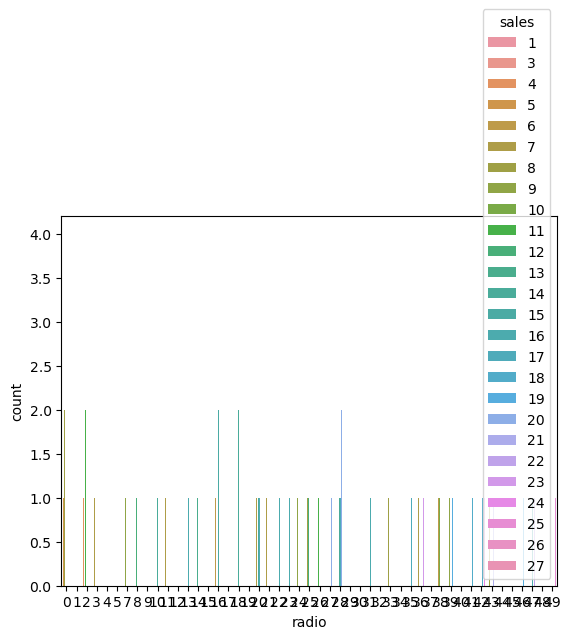

In [9]:
sb.countplot(x="radio",data=data,hue="sales")
plt.show()

In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.055388,0.055569,0.778044
radio,0.055388,1.000000,0.352552,0.579960
newspaper,0.055569,0.352552,1.000000,0.229429
sales,0.778044,0.579960,0.229429,1.000000


In [11]:
X_ID=data.iloc[:,0:3]
Y_dv=data["sales"]

In [12]:
X_ID
# Y_dv

,TV,radio,newspaper
0,230,37,69
1,44,39,45
2,17,45,69
3,151,41,58
4,180,10,58
...,...,...,...
195,38,3,13
196,94,4,8
197,177,9,6
198,283,42,66


In [13]:
model = LinearRegression()

In [14]:
trainer=model.fit(X_ID, Y_dv)

In [15]:
trainer.coef_

array([ 0.04580245,  0.19109745, -0.00055314])

In [16]:
trainer.intercept_

2.488273124099937

In [49]:
Yp = model.predict(X_ID)
residual=Y_dv-Yp

In [18]:
data["Yp"]=Yp

In [50]:
residual

0      1.944724
1     -1.931491
2     -2.828134
3      0.792643
4     -0.611607
         ...   
195    2.205132
196    1.446332
197   -0.311865
198    1.560047
199   -1.638796
Name: sales, Length: 200, dtype: float64

In [19]:
data

,TV,radio,newspaper,sales,Yp
0,230,37,69,22,20.055276
1,44,39,45,10,11.931491
2,17,45,69,9,11.828134
3,151,41,58,18,17.207357
4,180,10,58,12,12.611607
...,...,...,...,...,...
195,38,3,13,7,4.794868
196,94,4,8,9,7.553668
197,177,9,6,12,12.311865
198,283,42,66,25,23.439953


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
Error=mean_squared_error(Yp,Y_dv)

In [22]:
Error

2.897740521764533

In [31]:
# pip install gradio

In [24]:
data.isnull()

,TV,radio,newspaper,sales,Yp
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


# ## Linear Relationship

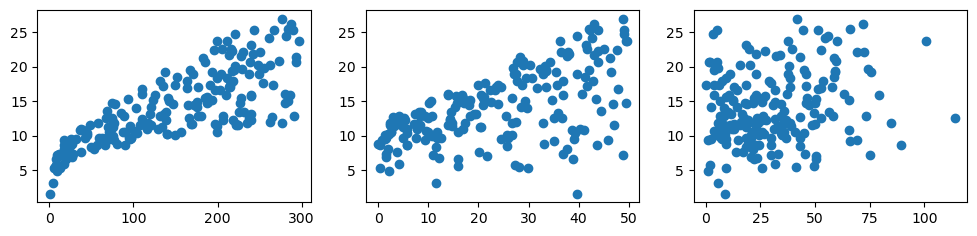

In [30]:
fig,(aa,bb,cc) = plt.subplots(ncols=3,figsize=(12,2.5))

aa.scatter(df['TV'],df['sales'])
bb.scatter(df['radio'],df['sales'])
cc.scatter(df['newspaper'],df['sales'])
plt.show()

### Multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]

for i in range(X_ID.shape[1]):
    vif.append(variance_inflation_factor(X_ID,i))

In [36]:
pd.DataFrame({'vif':vif},index=df.columns[1:4]).T

,TV,radio,newspaper
vif,2.455572,3.212168,2.992148


<Axes: >

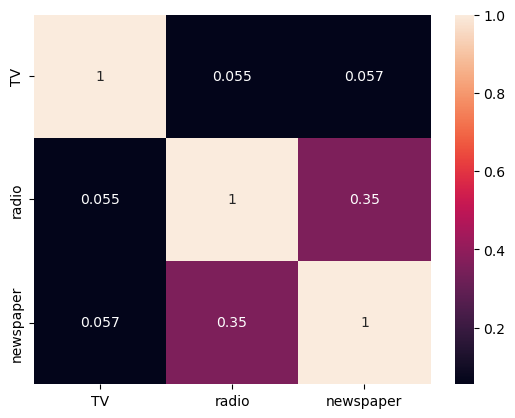

In [38]:
#another way
sb.heatmap(df.iloc[:,1:4].corr(),annot=True)

# ## Normal Residual

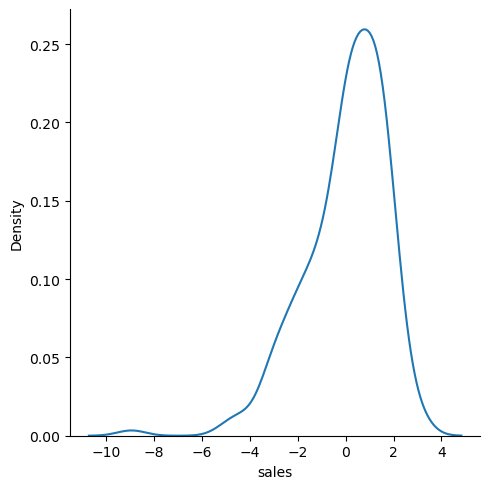

In [41]:
sb.displot(residual,kind='kde')

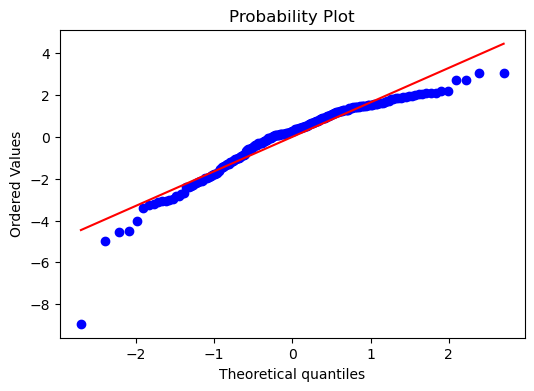

In [42]:
#Q-Q plot

import scipy as sp

fig, ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()

# Homoscedasticity

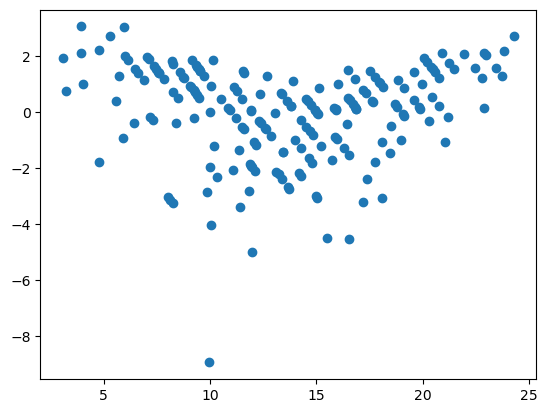

In [44]:
plt.scatter(Yp,residual)

# No Autocorrelation of error

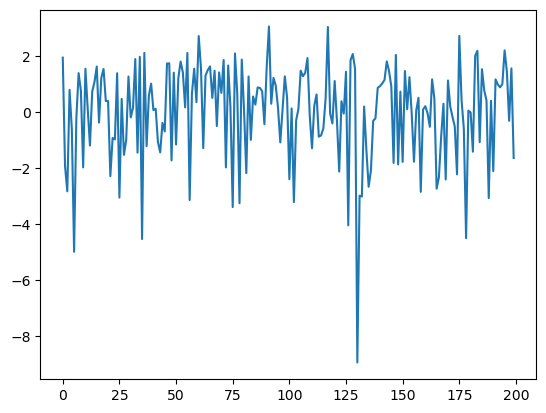

In [48]:
plt.plot(residual)